In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm
import os.path

import IPython

test_idx=6558
sel_points = [1173,4644,1891,4936,1735,3562]
try_iters = []
#try_iters = [100,140,80,30,10,1,300]
colors = ['xkcd:pink','xkcd:purple','xkcd:magenta','xkcd:salmon','xkcd:lilac','xkcd:rose','xkcd:peach']

sns.set(color_codes=True)

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [17]:
seed = 0
f = np.load('../../output/seed{}_actual_pred_infl_logreg_remove_{}.npz'.format(seed,sel_points))
predicted_loss_diffs = f['pred_infl']
warm_loss_diffs = f['warm_infl']

"""
f = np.load('../../output/hidden0_more_retraining.npz')
more_retraining_losses = f['losses']
more_retraining_losses[0] = 0.72049975
plt.plot(more_retraining_losses)
"""

KeyError: u'warm_infl is not a file in the archive'

[ 9.80079174e-04  3.09824944e-04  8.62479210e-05  1.50978565e-04
 -1.88887119e-04  4.08053398e-04]
[-7.73755941e-04  3.91605117e-04  1.32704197e-03 -7.58570433e-06
  3.37786068e-04  3.09359550e-04]


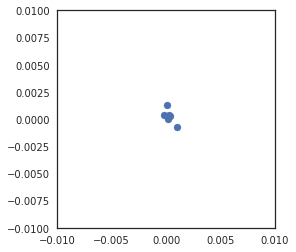

In [13]:
print(warm_loss_diffs)
plt.scatter(warm_loss_diffs, predicted_loss_diffs[sel_points])
plt.axes().set_aspect('equal')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.01)
print(predicted_loss_diffs[sel_points])

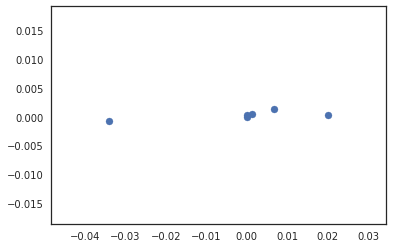

In [14]:
actual = [-0.0341802239418,0.00129979848862,0.00675773620605,3.57627868652e-05,0.0201961994171,-6.02006912231e-06]
plt.scatter(actual, predicted_loss_diffs[sel_points])

In [4]:
def plot_tracked_losses(seed,point):
    #oldpathname = '../../scr/output/seed{}_remove{}_losses.npz'.format(seed,point)
    #if os.path.exists(oldpathname+'bal'):
    #    f = np.load(oldpathname)
    #    losses = f['losses']
    #    losses_removed = f['losses_removed']
    #    losses_fine = f['losses_fine']
    #    losses_removed_fine = f['losses_removed_fine']
    #else:
    f = np.load('../../output/seed{}_losses_logreg.npz'.format(seed))
    losses = f['losses']
    losses_fine = f['losses_fine']
    f = np.load('../../output/seed{}_remove{}_only_losses_logreg.npz'.format(seed,point))
    losses_removed = f['losses_removed']
    losses_removed_fine = f['losses_removed_fine']
    diffs = np.subtract(losses_removed,losses)
    diffs_fine = np.subtract(losses_removed_fine,losses_fine)
    
    
# lukewarm losses along the way at
# '../../scr/output/mnist_small_all_cnn_c_hidden0_seed0-iter-100000_remove1173_retrain_losses'
# and similarly for 4644, 1891, 4936, 1735, 3562

    sns.set_style('white')
    fontsize=16
    fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(8, 8))
    plt.subplots_adjust(wspace=0.4)
    plt.suptitle('Seed {} Remove {}: {}'.format(seed, point,predicted_loss_diffs[point]))

    extras = []
    retrain_losses = []
    for num_iters in try_iters:
        if num_iters != 300:
            retrain_pathname = '../../output/mnist_small_all_cnn_c_hidden0_seed{}_iter-{}000_remove{}_retrain_losses.npz'.format(seed,num_iters,point)
        else:
            retrain_pathname = '../../output/mnist_small_all_cnn_c_logreg_seed{}_iter-{}000_remove{}_retrain_losses.npz'.format(seed,num_iters,point)
        extra = (seed == 0 and point in sel_points and os.path.exists(retrain_pathname))
        extras.append(extra)
        if extra:
            f = np.load(retrain_pathname)
            retrain_losses.append(f['retrain_losses'])
        else:
            retrain_losses.append([])
    

    #axs[0][0].plot(range(330),list(losses)+list(more_retraining_losses))
    axs[0][0].plot(range(300),list(losses))
    axs[0][0].plot(range(300),losses_removed)
    for i, num_iters in enumerate(try_iters):
        if extras[i]:
            if num_iters != 300:
                axs[0][0].plot(range(num_iters,300),retrain_losses[i],color=colors[i])
            else:
                axs[0][0].plot(range(300,330),retrain_losses[i],color=colors[i])
    axs[0][0].set_xlabel('Thousands of steps')
    axs[0][0].set_ylabel('Loss on test pt')

    axs[0][1].scatter(range(300),diffs,alpha=0.5)
    for i, num_iters in enumerate(try_iters):
        if extras[i]:
            if num_iters != 300:
                axs[0][1].scatter(range(num_iters,300),np.subtract(retrain_losses[i],losses[num_iters:]),alpha=0.2,color=colors[i])
            #else:
            #    axs[0][1].scatter(range(300,330),np.subtract(retrain_losses[i],more_retraining_losses),alpha=0.2,color=colors[i])
    #if extra_old:
    #    axs[0][1].scatter(range(55,110),np.subtract(losses[55:110],losses[110]),alpha=0.5,color='xkcd:purple')
    #    axs[0][1].scatter(range(100,300),np.subtract(retrain_old,losses[100:]),alpha=0.5,color='xkcd:pink')
    axs[0][1].set_xlabel('Thousands of steps')
    axs[0][1].set_ylabel('Diff in loss')
    axs[0][1].hlines(0,-1,301,color='k',alpha=0.5,zorder=1)
    axs[0][1].plot(range(300), np.poly1d(np.polyfit(range(300), diffs, 1))(range(300)),color='r')

    axs[1][0].plot(range(100),losses_fine)
    axs[1][0].plot(range(100),losses_removed_fine)
    axs[1][0].set_xlabel('Steps')
    axs[1][0].set_ylabel('Loss on test pt')

    axs[1][1].scatter(range(100),diffs_fine,alpha=0.5)
    axs[1][1].set_xlabel('Steps')
    axs[1][1].set_ylabel('Diff in loss')
    axs[1][1].hlines(0,-1,101,color='k',alpha=0.5,zorder=1)
    axs[1][1].plot(range(100), np.poly1d(np.polyfit(range(100), diffs_fine, 1))(range(100)),color='r')
    
    print("Orig {}, removed {}".format(losses[299],losses_removed[299]))
    print("Actual: {}".format(losses_removed[299]-losses[299]))
    print("Pred: {}".format(predicted_loss_diffs[point]))

Orig 0.72051692009, removed 0.686336696148
Actual: -0.0341802239418
Pred: -0.000773755940524
Orig 0.72051692009, removed 0.721816718578
Actual: 0.00129979848862
Pred: 0.000391605117104
Orig 0.72051692009, removed 0.727274656296
Actual: 0.00675773620605
Pred: 0.00132704197277
Orig 0.72051692009, removed 0.720552682877
Actual: 3.57627868652e-05
Pred: -7.58570432663e-06
Orig 0.72051692009, removed 0.740713119507
Actual: 0.0201961994171
Pred: 0.000337786067616
Orig 0.72051692009, removed 0.720510900021
Actual: -6.02006912231e-06
Pred: 0.000309359550476


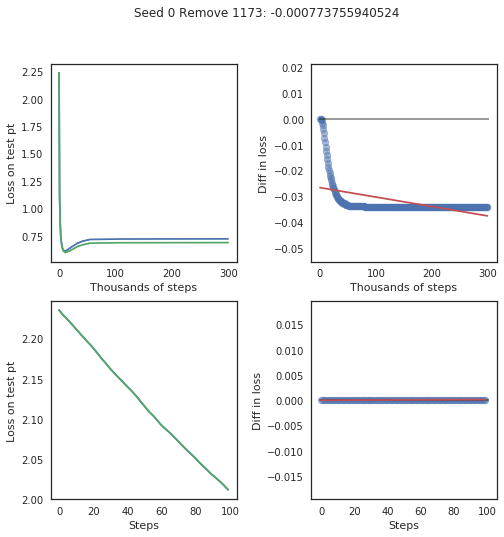

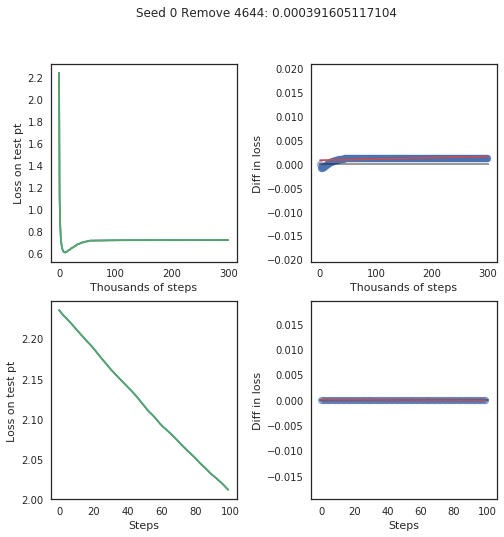

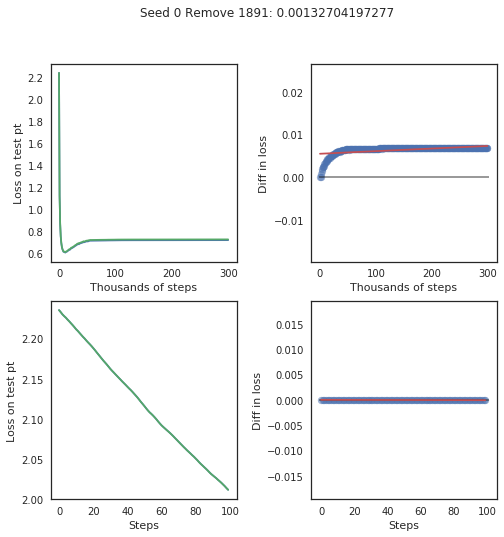

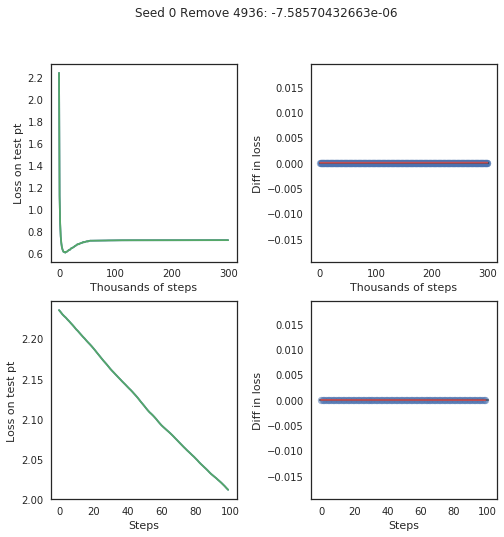

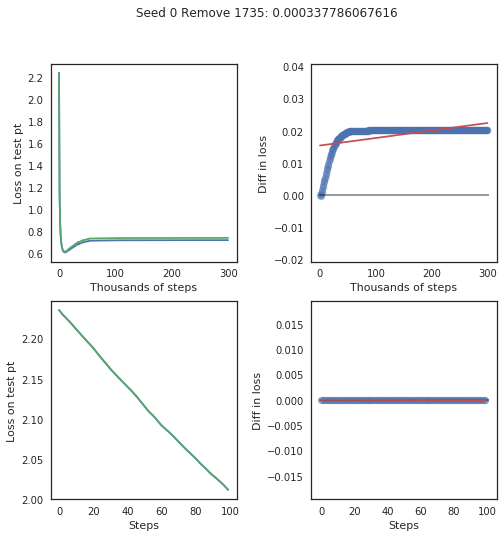

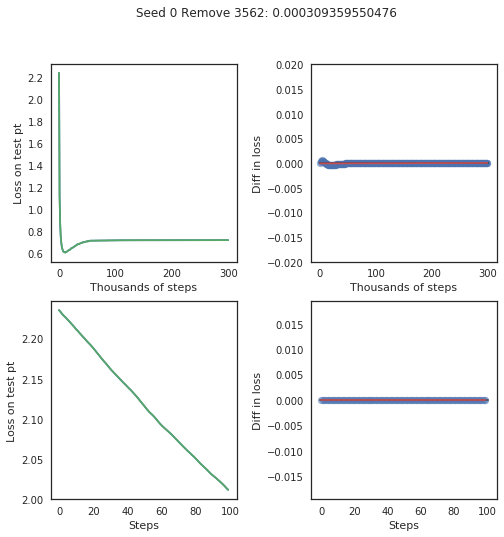

In [16]:
plot_tracked_losses(0,1173)
plot_tracked_losses(0,4644)
plot_tracked_losses(0,1891)
plot_tracked_losses(0,4936)
plot_tracked_losses(0,1735)
plot_tracked_losses(0,3562)

In [6]:
"""
seed = 1
f = np.load('../../scr/output/seed{}_pred_infl_logreg.npz'.format(seed))
predicted_loss_diffs = f['pred_infl']
plot_tracked_losses(1,1173)
plot_tracked_losses(1,4644)
plot_tracked_losses(1,1891)
"""

u"\nseed = 1\nf = np.load('../../scr/output/seed{}_pred_infl_logreg.npz'.format(seed))\npredicted_loss_diffs = f['pred_infl']\nplot_tracked_losses(1,1173)\nplot_tracked_losses(1,4644)\nplot_tracked_losses(1,1891)\n"

In [7]:
"""
warmstarts = [0.001034557819366455,0.0003699660301208496,0.00015056133270263672,
              0.00021028518676757812,-0.0001285076141357422,0.00047218799591064453]
plt.scatter(warmstarts,predicted_loss_diffs[sel_points])
plt.axes().set_aspect('equal')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.01)
plt.xlabel('Warm Start Influence')
plt.ylabel('Predicted Influence')
"""

u"\nwarmstarts = [0.001034557819366455,0.0003699660301208496,0.00015056133270263672,\n              0.00021028518676757812,-0.0001285076141357422,0.00047218799591064453]\nplt.scatter(warmstarts,predicted_loss_diffs[sel_points])\nplt.axes().set_aspect('equal')\nplt.xlim(-0.01,0.01)\nplt.ylim(-0.01,0.01)\nplt.xlabel('Warm Start Influence')\nplt.ylabel('Predicted Influence')\n"